In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data= pd.read_csv("clients.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [5]:
#la distribution de la variable cible 
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


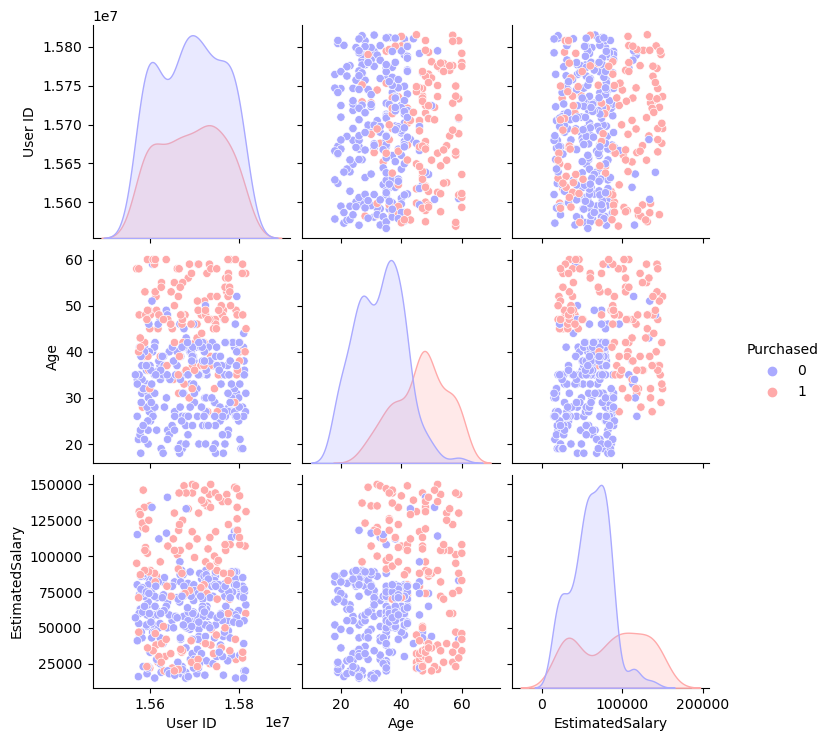

In [6]:
import seaborn as sns
sns.pairplot(data,hue='Purchased',palette='bwr')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


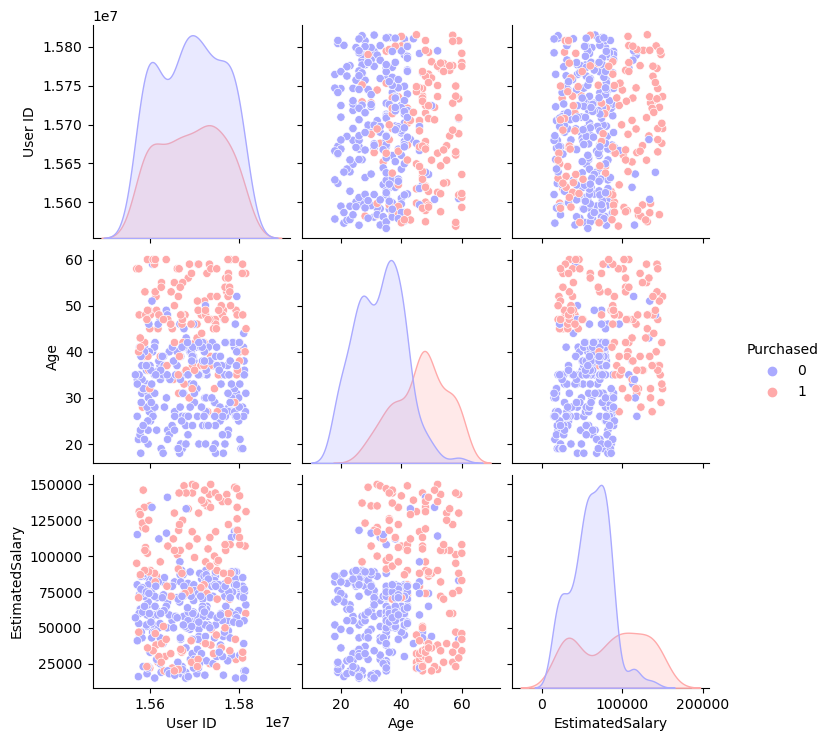

In [6]:
import seaborn as sns
sns.pairplot(data,hue='Purchased',palette='bwr')

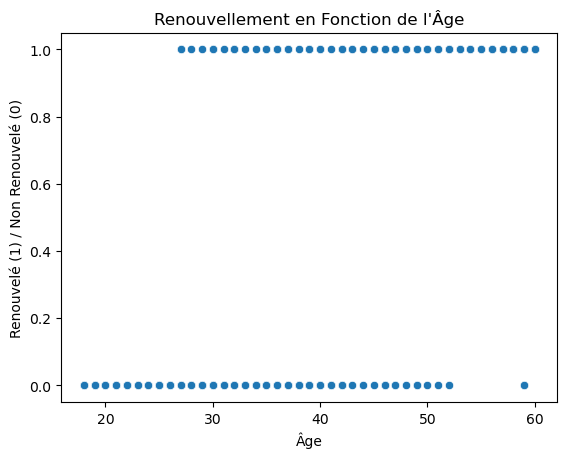

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un diagramme en nuage de points
sns.scatterplot(data=data, x='Age', y='Purchased')
plt.xlabel('Âge')
plt.ylabel('Renouvelé (1) / Non Renouvelé (0)')
plt.title('Renouvellement en Fonction de l\'Âge')
plt.show()


In [6]:
#tableau de probabilites


In [7]:
#calcul les pi

In [47]:
#split base de donnees en variable cible et explique
x=data.drop(columns=['User ID','Gender'], axis=2)
y=data['Purchased']

In [57]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=2)
print(x_train)

      Age  EstimatedSalary  Purchased
112  38.0          61000.0          0
209  46.0          22000.0          0
294  35.0          57000.0          0
307  47.0         113000.0          1
345  41.0          63000.0          0
..    ...              ...        ...
299  46.0         117000.0          1
22   48.0          41000.0          1
72   20.0          23000.0          0
15   29.0          80000.0          0
168  29.0         148000.0          1

[280 rows x 3 columns]


In [58]:
#elaboration du modele de regression logistique 
model= LogisticRegression()

In [59]:
#elboration du modele de regression
model.fit (x_train, y_train)

LogisticRegression()

In [60]:
#prediction
x_train_prediction=model.predict(x_train)

In [61]:
#accuracy de x_train
accuracy_xtrain=accuracy_score(y_train,x_train_prediction)
print('accuracy_xtrain:',accuracy_xtrain)

accuracy_xtrain: 0.6428571428571429


In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [64]:
Y_Pred = classifier.predict(x_test)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test,Y_Pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        77
           1       0.86      0.74      0.80        43

    accuracy                           0.87       120
   macro avg       0.87      0.84      0.85       120
weighted avg       0.87      0.87      0.86       120



In [66]:
#system predictif de donnees 
x_new = np.array([[24,11000, 0]])
print(x_new)

[[   24 11000     0]]


In [67]:
Clique_pred = classifier.predict(x_new)
print(Clique_pred)

[0]


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [70]:
import statsmodels.api as sm
model = sm.MNLogit(y, x)

In [71]:
# Ajustement du modèle aux données
result = model.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
# Affichage des résultats du modèle
print(result.summary())

                          MNLogit Regression Results                          
Dep. Variable:              Purchased   No. Observations:                  400
Model:                        MNLogit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                   1.000
Time:                        20:48:52   Log-Likelihood:            -2.5204e-11
converged:                      False   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                5.519e-114
    Purchased=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -1.3492   2.17e+04  -6.21e-05      1.000   -4.26e+04    4.26e+04
EstimatedSalary -4.928e-05      9.261  -5.32e-06      1.000     -18.152      18.151
Purchased         113.7477    8.

Matrice de confusion :
[[72  5]
 [11 32]]


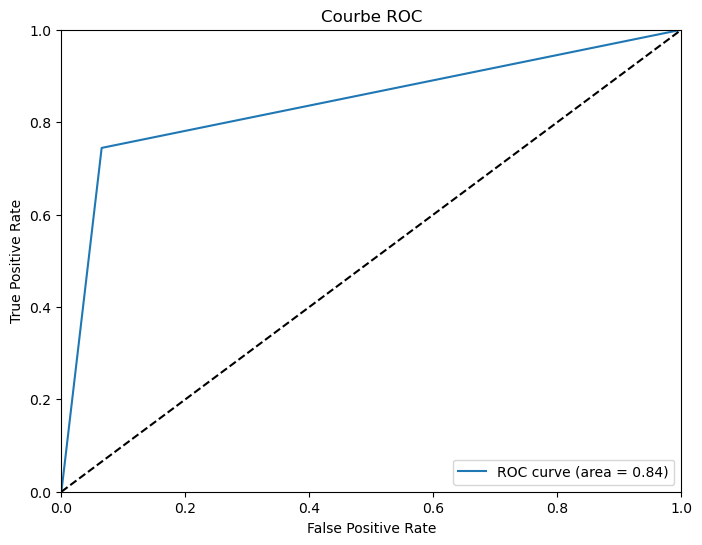

In [139]:
# Import des bibliothèques nécessaires
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Supposons que y_true soit les vraies valeurs et y_pred soit les prédictions de votre modèle

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, Y_Pred )

# Affichage de la matrice de confusion
print("Matrice de confusion :")
print(cm)
# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, Y_Pred )

# Calcul de l'AUC (Area Under the Curve)
auc = roc_auc_score(y_test, Y_Pred )

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Droite diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [141]:

from sklearn.model_selection import train_test_split

# Supposons que X soit votre jeu de données d'entités et y soit la variable à prédire

# Diviser les données en ensembles d'apprentissage et de test tout en stratifiant la variable cible
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Afficher les distributions des classes dans les ensembles d'apprentissage et de test
print("Distribution des classes dans l'ensemble d'apprentissage:")
print(y_train.value_counts(normalize=True))

print("\nDistribution des classes dans l'ensemble de test:")
print(y_test.value_counts(normalize=True))


Distribution des classes dans l'ensemble d'apprentissage:
Purchased
0    0.64375
1    0.35625
Name: proportion, dtype: float64

Distribution des classes dans l'ensemble de test:
Purchased
0    0.6375
1    0.3625
Name: proportion, dtype: float64


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Supposons que X soit vos caractéristiques et y soit votre variable cible

# Diviser les données en ensembles d'apprentissage et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(x_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(x_test)

# Calculer l'erreur quadratique moyenne (MSE) pour évaluer l'adéquation du modèle
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne (MSE) :", mse)


Erreur quadratique moyenne (MSE) : 0.35


In [147]:
import numpy as np
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

# Récupérer les probabilités prédites
predicted_probabilities = model.predict_proba(x_test)[:, 1]

# Calculer les résidus standardisés
residuals = y_test - predicted_probabilities

# Test d'homoscédasticité
homoscedasticity_test = np.var(residuals)
print("test d'omnibus :", homoscedasticity_test)

# Test de normalité des résidus
shapiro_test_statistic, shapiro_p_value = shapiro(residuals)
print("Test de Shapiro-Wilk (Statistic):", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

# Test de corrélation des résidus
durbin_watson_statistic = durbin_watson(residuals)
print("Test de Durbin-Watson (Statistic):", durbin_watson_statistic)



test d'omnibus : 0.23308201895331063
Test de Shapiro-Wilk (Statistic): 0.6346460580825806
p-value: 8.344353311616481e-13
Test de Durbin-Watson (Statistic): 2.4576743043979725


In [149]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# Supposons que vous avez déjà ajusté votre modèle de régression logistique et obtenu result_adjusted

# Calculer le test de vraisemblance
llf_null = model.llf
llf_adjusted = model.llf
lr_statistic = 2 * (llf_adjusted - llf_null)  # Statistique du rapport de vraisemblance
df = result_adjusted.df_model - result_null.df_model  # Degré de liberté
p_value_lr = stats.chi2.sf(lr_statistic, df)  # Valeur p du test de vraisemblance

# Calculer le test Omnibus
omnibus_test_statistic = result_adjusted.omnibus
p_value_omnibus = result_adjusted.omnibus_pvalue()

# Calculer le test de Jarque-Bera
jb_test_statistic = result_adjusted.jb
p_value_jb = result_adjusted.jb_pvalue

# Calculer le test de Durbin-Watson
durbin_watson_statistic = durbin_watson(result_adjusted.resid)

# Créer un DataFrame pour les résultats des tests
test_results = pd.DataFrame({
    'Test': ['Test de Vraisemblance', 'Test Omnibus', 'Test de Jarque-Bera', 'Test de Durbin-Watson'],
    'Statistic': [lr_statistic, omnibus_test_statistic, jb_test_statistic, durbin_watson_statistic],
    'p-value': [p_value_lr, p_value_omnibus, p_value_jb, None]  # Durbin-Watson n'a pas de p-value
})

# Afficher le DataFrame
print(test_results)


AttributeError: 'LogisticRegression' object has no attribute 'llf'

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


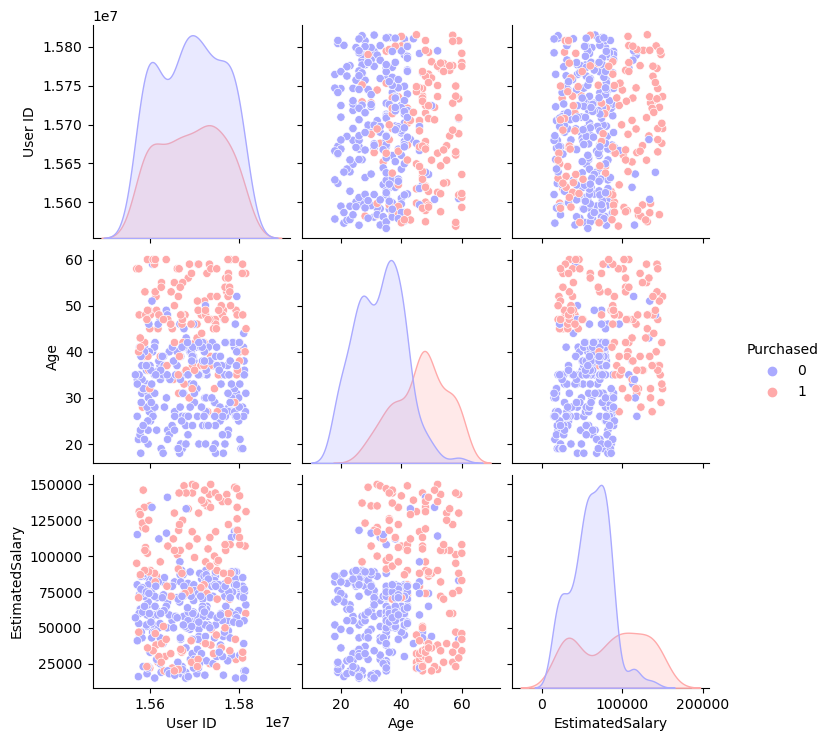

In [8]:
import seaborn as sns
sns.pairplot(data,hue='Purchased',palette='bwr')

